In [3]:
import numpy as np
import pandas as pd
import sklearn
import re
import seaborn as sns
from matplotlib.pylab import plt

In [4]:
file ='/home/swaraj/Downloads/Rental data pune.xlsx'
df= pd.read_excel(file)

In [5]:
 df['bhk']=df['BHK'].apply(lambda x: re.sub(r"\D", " ", str(x)) )#removing the string
df['bath_clean']=df['Bath'].apply(lambda x: re.sub(r"\D", "", str(x)) )
df['source']='99acres'

In [6]:
df.info()
df['Bath'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Link         9893 non-null   object
 1   Title        9893 non-null   object
 2   location     8767 non-null   object
 3   Rent         9893 non-null   object
 4   Area Sq.ft   9893 non-null   object
 5   BHK          9838 non-null   object
 6   Bath         8728 non-null   object
 7   Posted Date  9893 non-null   object
 8   Name         9892 non-null   object
 9   bhk          9893 non-null   object
 10  bath_clean   9893 non-null   object
 11  source       9893 non-null   object
dtypes: object(12)
memory usage: 927.6+ KB


count        8728
unique         10
top       2 Baths
freq         4030
Name: Bath, dtype: object

count        8728
unique         10
top       2 Baths
freq         4030
Name: Bath, dtype: object

In [7]:
df['BHK']= df['BHK'].dropna(axis=0)
df=df.dropna()
df['Bath']=df['Bath'].fillna(2)
df['dates']=df['Posted Date'].apply(lambda x: re.sub(r"Posted on", " ", str(x)) )
df['dates']=df['dates'].apply(lambda x: re.sub(r"by", " ", str(x)) )
df['dates']=df['dates'].apply(lambda x: re.sub(r"Today", "17th Mar, 2021 ", str(x)) )
df['dates']=df['dates'].apply(lambda x: re.sub(r"Yesterday", "16th Mar, 2021 ", str(x)) )
df['dates']=pd.to_datetime(df['dates'])
df['Area Sq.ft']=df['Area Sq.ft'].apply(lambda x: re.sub(r"\D", "", str(x)) )
df['Rent']=df['Rent'].apply(lambda x: re.sub('[^A-Za-z0-9]+', "", x) )
df['Rent']=df['Rent'].apply(lambda x: re.sub('PriceonRequest', "NAN", x) )
df['Rent']=np.where(df['Rent']=='Price on Request',df['Rent'].median(),df['Rent'])
df['Rent'].dropna()
df['Rent']=np.where(df['Rent']=='NAN',df['Rent'].median(),df['Rent'])
df['Rent']=df['Rent'].apply(lambda x: np.int64(x) )
df['Rent'].isnull().sum(axis = 0)
df['Title_modify']=df['Title'].apply(lambda x: re.sub(r'^.*?in', '', x))
x=df[['Area Sq.ft','bhk', 'bath_clean']]
y=df.Rent

In [8]:
df

,Link,Title,location,Rent,Area Sq.ft,BHK,Bath,Posted Date,Name,bhk,bath_clean,source,dates,Title_modify
0,https://www.99acres.com/2-bhk-bedroom-resident...,2 BHK Residential Apartment for rent in Mahalunge,Saarthi Soverign,15000,950,2 BHK,2 Baths,Posted on Today by,Channa,2,2,99acres,2021-03-17,Mahalunge
1,https://www.99acres.com/2-bhk-bedroom-resident...,2 BHK Residential Apartment for rent in B.T Ka...,"Maruti Enclave, Tara Dutta Colony",12000,600,2 BHK,1 Bath,Posted on Today by,Santosh Shrivastava,2,1,99acres,2021-03-17,B.T Kawade Road
2,https://www.99acres.com/2-bhk-bedroom-resident...,2 BHK Residential Apartment for rent in Vijay ...,Jeveen Anand,14000,782,2 BHK,2 Baths,Posted on Today by,Prashant,2,2,99acres,2021-03-17,Vijay Nagar
4,https://www.99acres.com/2-bhk-bedroom-resident...,2 BHK Residential Apartment for rent in Lohegaon,Goodwill Unique Zest County,16000,667,2 BHK,2 Baths,Posted on Today by,Sharat Pavate,2,2,99acres,2021-03-17,Lohegaon
5,https://www.99acres.com/2-bhk-bedroom-resident...,2 BHK Residential Apartment for rent in Manik ...,Nikhil Park,11000,735,2 BHK,1 Bath,Posted on Today by,Ashok kori,2,1,99acres,2021-03-17,Manik Baug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,https://www.99acres.com/2-bhk-bedroom-resident...,2 BHK Residential Apartment for rent in Hinjewadi,Kohinoor Tinsel Town Phase 2,23000,1011,2 BHK,2 Baths,"Posted on 01st Mar, 2021 by",Ankit,2,2,99acres,2021-03-01,Hinjewadi
9888,https://www.99acres.com/1-bhk-bedroom-resident...,1 BHK Residential Apartment for rent in Hingan...,Mayureshwara Heights,10000,650,1 BHK,1 Bath,"Posted on 08th Mar, 2021 by",balasaheb,1,1,99acres,2021-03-08,Hingane Home Colony
9889,https://www.99acres.com/1-bhk-bedroom-resident...,1 BHK Residential Apartment for rent in Pimple...,Vaishnavi Sahil Heights,14000,583,1 BHK,2 Baths,"Posted on 22nd Feb, 2021 by",Mayur jagtap,1,2,99acres,2021-02-22,Pimple Nilakh
9891,https://www.99acres.com/2-bhk-bedroom-resident...,2 BHK Residential Apartment for rent in Bhukum,SKYi Star Towers,12500,570,2 BHK,2 Baths,"Posted on 09th Mar, 2021 by",Abhishek Kumar,2,2,99acres,2021-03-09,Bhukum


In [9]:
df.Rent.describe()

count     7745.000000
mean     15153.416269
std       7534.581466
min          1.000000
25%      10000.000000
50%      14000.000000
75%      18500.000000
max      80000.000000
Name: Rent, dtype: float64

In [10]:
df['Title_modify'].describe()

count         7745
unique        1296
top        Wagholi
freq           323
Name: Title_modify, dtype: object

In [11]:
x.describe()

,Area Sq.ft,bhk,bath_clean
count,7745,7745,7745
unique,1055,10,9
top,1000,2,2
freq,330,3762,3862


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [13]:
"""from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
x['Title_modify']= label_encoder.fit_transform(x['Title_modify']) """

"from sklearn import preprocessing \n  \n# label_encoder object knows how to understand word labels. \nlabel_encoder = preprocessing.LabelEncoder() \n  \n# Encode labels in column 'species'. \nx['Title_modify']= label_encoder.fit_transform(x['Title_modify']) "

In [14]:
col=x.columns
for c in col:
    try:
        c=str(c)
        x[c]=x[c].apply(lambda x:float(x))
    except:
        x[c]=0

<ipython-input-14-c1491ac019d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[c]=x[c].apply(lambda x:float(x))


[0.338141   0.39299771 0.26886129]


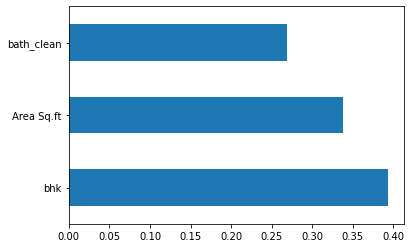

In [15]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
regressor=RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv =10 , verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(x_train,y_train)
rf_random.best_params_
rf_random.best_score_
prediction=rf_random.predict(x_valid)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, 

/home/swaraj/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rent', ylabel='Density'>

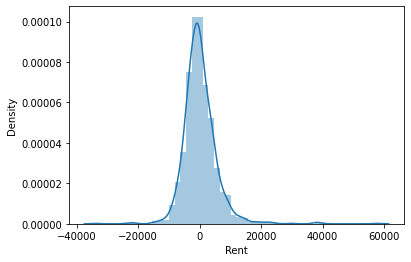

In [17]:
sns.distplot(y_valid-prediction)

In [18]:
print(errt)

NameError: name 'errt' is not defined

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    
    'max_depth': [rf_random.best_params_['max_depth']],
    'max_features': [rf_random.best_params_['max_features']],
    'min_samples_leaf': [rf_random.best_params_['min_samples_leaf'], 
                         rf_random.best_params_['min_samples_leaf']+2, 
                         rf_random.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_random.best_params_['min_samples_split'] - 2,
                          rf_random.best_params_['min_samples_split'] - 1,
                          rf_random.best_params_['min_samples_split'], 
                          rf_random.best_params_['min_samples_split'] +1,
                          rf_random.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_random.best_params_['n_estimators'] - 50, rf_random.best_params_['n_estimators'] - 100, 
                     rf_random.best_params_['n_estimators'], 
                     rf_random.best_params_['n_estimators'] + 100, rf_random.best_params_['n_estimators'] + 50]
}

print(param_grid)
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)
the_best=grid_search.best_estimator_
predictions=the_best.predict(x_valid)

{'max_depth': [5], 'max_features': ['sqrt'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [8, 9, 10, 11, 12], 'n_estimators': [500, 600, 700, 800, 900]}


/home/swaraj/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rent', ylabel='Density'>

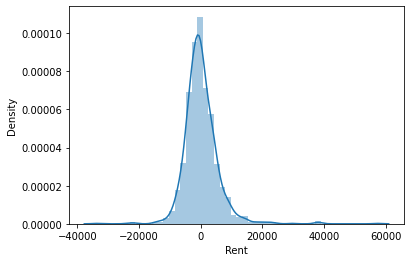

In [171]:
sns.distplot(y_valid-predictions)

In [172]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))

Mean Absolute Error: 3696.927592157215
Mean Squared Error: 30394888.823689833
Root Mean Squared Error: 5513.155976724206


In [176]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, prediction)))

Mean Absolute Error: 3697.8964913663017
Mean Squared Error: 30408374.386568803
Root Mean Squared Error: 5514.378875863428


In [55]:
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.linear_model import LinearRegression,ridge_regression,Ridge,Lasso
parametrs={'alpha':[10^-3,10^-2,10^-1,1,5,6,7,10,12,15,20,25,30,35,45,56,67,78,90,100,105,110,115,120,130,140,150]}

In [63]:
ridge_regression_op=Ridge()
the_grid=GridSearchCV(ridge_regression_op,parametrs,cv=10,scoring='neg_mean_squared_error')
the_grid.fit(x,y)
the_ridge=the_grid.best_estimator_
sq=the_grid.best_score_
ridge_prediction=the_ridge.predict(x_valid)
sns.distplot(y_valid-ridge_prediction)

In [71]:
lasso_regression_op=Lasso()
the_grid_lasso=GridSearchCV(lasso_regression_op,parametrs,cv=10,scoring='neg_mean_squared_error')
the_grid_lasso.fit(x,y)
the_lasso=the_grid_lasso.best_estimator_
sq=the_grid_lasso.best_score_
theprediction_lasso=the_lasso.predict(x_valid)
sns.distplot(y_valid-theprediction_lasso)

/home/swaraj/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 558153529351.0255, tolerance: 40100775.120994836
  model = cd_fast.enet_coordinate_descent(
/home/swaraj/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 562969967444.1123, tolerance: 40620203.33907636
  model = cd_fast.enet_coordinate_descent(
/home/swaraj/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 545949610156.8357, tolerance: 39306418.474427655
  model = cd_fast.enet_coordinate_descent(
/home/swaraj/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:

In [78]:
dat=[x,y]
z=pd.concat(dat)

In [82]:
df_good=df[['location','Area Sq.ft','bhk','bath_clean','dates','Title_modify']]

In [92]:
!ls

 random_forest_rental_estimitor.pkl	 the_the_lasso_rent_estimator.pkl
'rental call.ipynb'			 the_the_ridge_rent_estimator
 the_good_modified_dataset_of_rent.csv	 the_the_ridge_rent_estimator.pkl
 the_the_lasso_rent_estimator


In [86]:
df_good.to_csv('/run/media/swaraj/volume y/code/work/working/rent_estimetoer/the_good_modified_dataset_of_rent.csv')

In [91]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(the_lasso, open('/run/media/swaraj/volume y/code/work/working/rent_estimetoer/the_the_lasso_rent_estimator.pkl', 'wb'))
pickle.dump(the_ridge, open('/run/media/swaraj/volume y/code/work/working/rent_estimetoer/the_the_ridge_rent_estimator.pkl', 'wb'))

In [100]:
df_good.Title_modify.unique()

array([' Mahalunge', ' B.T Kawade Road', ' Vijay Nagar', ...,
       ' Khadki, Aundh Road', ' Bhairavnath Mandir Kasba Peth',
       ' Hingane Home Colony'], dtype=object)

##https://towardsdatascience.com/ai-and-real-state-renting-in-amsterdam-part-1-5fce18238dbc

In [102]:
df_good.location.unique()

array(['Saarthi Soverign', 'Maruti Enclave, Tara Dutta Colony',
       'Jeveen Anand', ..., 'Kalpa Vruksha', 'Grafikon Niwas',
       'Mayureshwara Heights'], dtype=object)